In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel("cars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [36]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [37]:
abs(df.corr()["Price"]).sort_values(ascending=False)

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

In [4]:
x=df[["Price","Mileage","Cylinder"]]

In [5]:
x.sample(5)

,Price,Mileage,Cylinder
434,17986.224091,17488,6
264,14275.127635,18533,4
574,15979.014837,21974,6
420,19446.882941,932,6
304,13699.035780,25845,4


In [6]:
x.tail()

,Price,Mileage,Cylinder
799,16507.070267,16229,6
800,16175.957604,19095,6
801,15731.132897,20484,6
802,15118.893228,25979,6
803,13585.636802,35662,6


In [7]:
model=KMeans(n_clusters=4)

In [8]:
model=model.fit(x)

In [9]:
pred=model.predict(x)

In [10]:
pred

array([3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 0, 1,
       1, 0, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,

In [11]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [12]:
silhouette_score(x,pred)

0.41516779758151606

In [13]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 0, 1,
       1, 0, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,

No handles with labels found to put in legend.


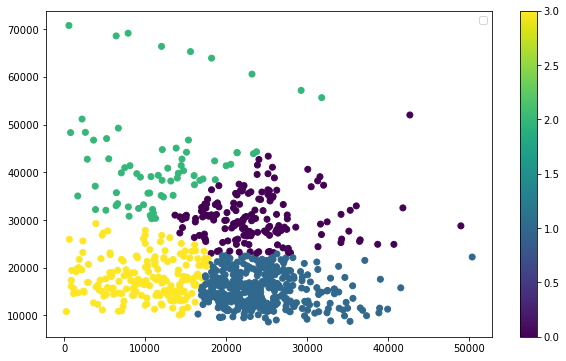

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=pred)
plt.legend()
plt.colorbar()
plt.show();


In [26]:
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(x)
        score=silhouette_score(x,pred)
        print(f"Number of cluster{no_of_cluster},silhouette{score}")
        allscore.append(score)
        allclusters.append(no_of_cluster)

clust(10)
    

Number of cluster2,silhouette0.4506564620037672
Number of cluster3,silhouette0.4132108639216514
Number of cluster4,silhouette0.4119395558502117
Number of cluster5,silhouette0.3567825102443609
Number of cluster6,silhouette0.36116550152546584
Number of cluster7,silhouette0.3588288805538296
Number of cluster8,silhouette0.33962686951003007
Number of cluster9,silhouette0.3695900303436099
Number of cluster10,silhouette0.3594211176546421


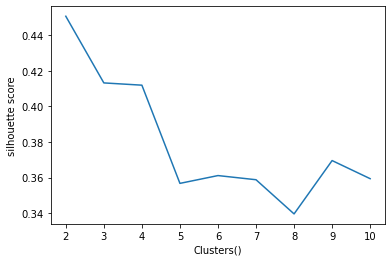

In [28]:
plt.plot(allclusters,allscore)
plt.xlabel("Clusters()")
plt.ylabel("silhouette score");


In [29]:
allscore= []
allclusters= []
sum_of_squared_distances= []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print("Number of cluster {},silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)

clust(9)

Number of cluster 2,silhouette 0.45170119051536717
Number of cluster 3,silhouette 0.4132108639216514
Number of cluster 4,silhouette 0.4101003710725703
Number of cluster 5,silhouette 0.3550640642212742
Number of cluster 6,silhouette 0.3593594107810751
Number of cluster 7,silhouette 0.36318352557888467
Number of cluster 8,silhouette 0.36254258247252374
Number of cluster 9,silhouette 0.34858734504994376


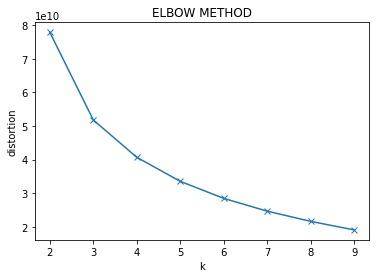

In [34]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("distortion")
plt.title("ELBOW METHOD")
plt.show();